In [1]:
%%capture
## [TEMPLATE BEGIN]
## おまじない：実行中のノートブック名からOUTPUT_DIRを決めるコード
from pathlib import Path
from IPython import get_ipython; ip = get_ipython()
if '__vsc_ipynb_file__' in ip.user_ns:
    ## VS Codeで実行されている場合
    THIS_NOTEBOOK_PATH = Path(ip.user_ns['__vsc_ipynb_file__'])
else:
    !pip install ipynbname
    import ipynbname; THIS_NOTEBOOK_PATH = Path(ipynbname.path())
    if "%2F" in THIS_NOTEBOOK_PATH.stem:
        ## Google Colabで実行されている場合
        colab_ip = %system hostname -I   # uses colab magic to get list from bash
        colab_ip = colab_ip[0].strip()   # returns "172.28.0.12"
        colab_port = 9000                # could use 6000, 8080, or 9000
        import requests
        filename = requests.get(f"http://{colab_ip}:{colab_port}/api/sessions").json()[0]["name"]
        THIS_NOTEBOOK_PATH = Path(filename)
    else:
        ## それ以外の場合
        THIS_NOTEBOOK_PATH = THIS_NOTEBOOK_PATH

OUTPUT_DIR = Path("figures") / THIS_NOTEBOOK_PATH.stem
## [TEMPLATE END]

In [2]:
print("File output directory:", OUTPUT_DIR)
# Create the output directory if it does not exist
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

File output directory: figures/_simple_linear_ols_regression


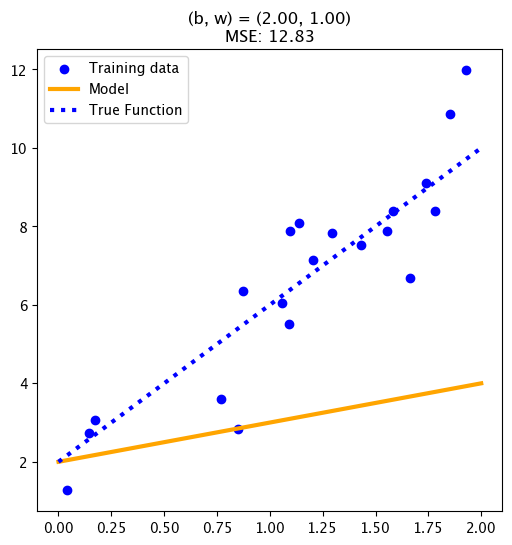

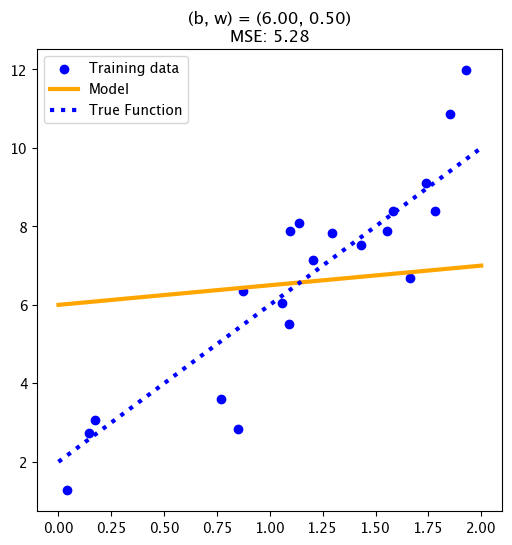

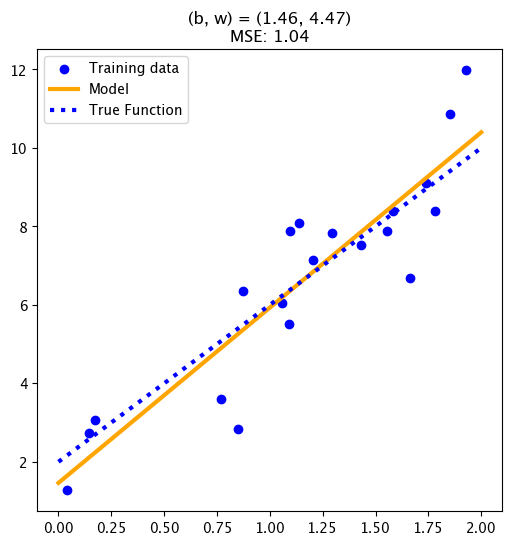

(12.828114547067655, 5.281428146296841, 1.0366953502874783)

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pathlib import Path

# Set up a color palette
colors = {
    'white': '#FFFFFF',
    'light_gray': '#D3D3D3',
    'gray': '#808080',
    'black': '#000000',
    'green': '#008000',
    'blue': '#0000FF',
    'light_blue': '#ADD8E6',
    'light_light_blue': '#E0FFFF',
    'yellow': '#FFFF00',
    'orange': '#FFA500',
    'dark_orange': '#FF8C00',
    'purple': '#800080',
}

# Updated true function
def true_function(X):
    return 2 + 4 * X  # New bias and weight

# Create synthetic data with reduced sample size
np.random.seed(0)
X = 2 * np.random.rand(20, 1)
y = true_function(X) + np.random.randn(20, 1)

# Create test data for error calculation
X_test = 2 * np.random.rand(1000, 1)
y_test = true_function(X_test) + np.random.randn(1000, 1)

# Function to calculate mean squared error
def calculate_mse(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = np.mean((y_pred - y_test) ** 2)
    return mse

# First model (arbitrary fixed slope and intercept)
model1 = LinearRegression()
model1.coef_ = np.array([[1]])  # arbitrary slope
model1.intercept_ = np.array([2])  # arbitrary intercept
model1.fit_intercept = False
mse1 = calculate_mse(model1, X_test, y_test)

# Second model (more incorrect)
model2 = LinearRegression()
model2.coef_ = np.array([[0.5]])  # more arbitrary slope
model2.intercept_ = np.array([6])  # more arbitrary intercept
model2.fit_intercept = False
mse2 = calculate_mse(model2, X_test, y_test)

# Third model (least squares solution)
model3 = LinearRegression()
model3.fit(X, y)
mse3 = calculate_mse(model3, X_test, y_test)

# Plotting the models
X_plot = np.array([[0], [2]])

# Plot model 1
plt.figure(figsize=(6, 6))
plt.scatter(X, y, color=colors['blue'], label='Training data')
plt.plot(X_plot, model1.predict(X_plot), color=colors['orange'], linewidth=3, label='Model')
plt.plot(X_plot, true_function(X_plot), color=colors['blue'], linestyle=':', linewidth=3, label='True Function')
plt.title(f'(b, w) = ({model1.intercept_[0]:.2f}, {model1.coef_[0][0]:.2f})\nMSE: {mse1:.2f}')
plt.legend()
plt.savefig(OUTPUT_DIR / "model_1.png", bbox_inches='tight', pad_inches=0)
plt.show()

# Plot model 2
plt.figure(figsize=(6, 6))
plt.scatter(X, y, color=colors['blue'], label='Training data')
plt.plot(X_plot, model2.predict(X_plot), color=colors['orange'], linewidth=3, label='Model')
plt.plot(X_plot, true_function(X_plot), color=colors['blue'], linestyle=':', linewidth=3, label='True Function')
plt.title(f'(b, w) = ({model2.intercept_[0]:.2f}, {model2.coef_[0][0]:.2f})\nMSE: {mse2:.2f}')
plt.legend()
plt.savefig(OUTPUT_DIR / "model_2.png", bbox_inches='tight', pad_inches=0)
plt.show()

# Plot model 3
plt.figure(figsize=(6, 6))
plt.scatter(X, y, color=colors['blue'], label='Training data')
plt.plot(X_plot, model3.predict(X_plot), color=colors['orange'], linewidth=3, label='Model')
plt.plot(X_plot, true_function(X_plot), color=colors['blue'], linestyle=':', linewidth=3, label='True Function')
plt.title(f'(b, w) = ({model3.intercept_[0]:.2f}, {model3.coef_[0][0]:.2f})\nMSE: {mse3:.2f}')
plt.legend()
plt.savefig(OUTPUT_DIR / "model_3.png", bbox_inches='tight', pad_inches=0)
plt.show()

# Displaying the Mean Squared Errors
mse1, mse2, mse3